In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)



cuda


# regular kan

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 7.19e-03 | test_loss: 7.77e-03 | reg: 6.63e+00 | : 100%|█| 20/20 [00:05<00:00,  3.71it


saving model version 0.1


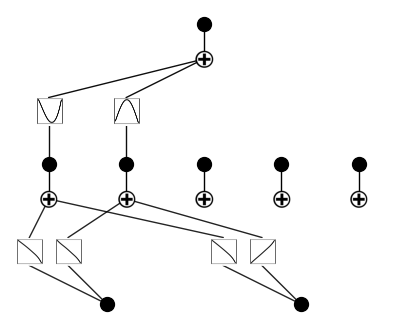

In [2]:
model = KAN(width=[2,5,1], device=device)

f = lambda x: x[:,0] * x[:,1]
dataset = create_dataset(f, n_var=2, device=device)
model.fit(dataset, steps=20, lamb=0.001);
model.plot()

# multkan

checkpoint directory created: ./model
saving model version 0.0


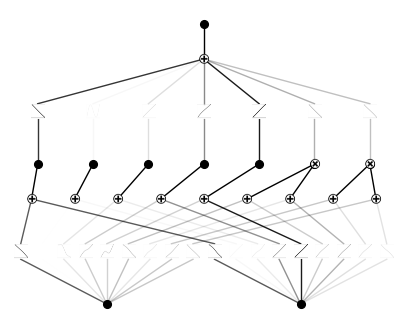

In [3]:
model = KAN(width=[2,[5,2],1], base_fun='identity', device=device)
model.get_act(dataset)
model.plot()

| train_loss: 1.54e-02 | test_loss: 1.61e-02 | reg: 5.30e+00 | : 100%|█| 20/20 [00:04<00:00,  4.04it


saving model version 0.1


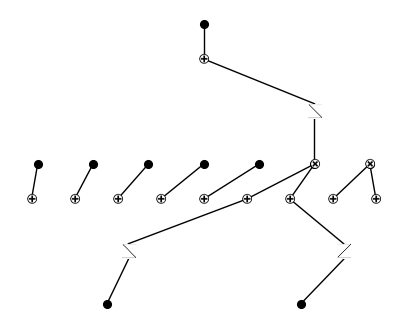

In [4]:
model.fit(dataset, steps=20, lamb=0.01, lamb_coef=1.0);
model.plot()

saving model version 0.2


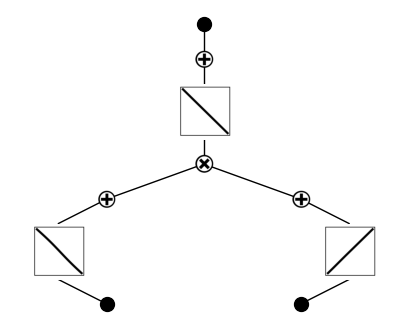

In [5]:
model = model.prune()
model.plot()

In [6]:
model.fit(dataset, steps=20);

| train_loss: 2.04e-09 | test_loss: 2.63e-09 | reg: 6.61e+00 | : 100%|█| 20/20 [00:04<00:00,  4.69it

saving model version 0.3


In [7]:
model.auto_symbolic()
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

fixing (0,0,0) with x, r2=0.9999999999895575, c=1
fixing (0,0,1) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with x, r2=0.9999999999911571, c=1
fixing (1,0,0) with x, r2=0.9999999999123743, c=1
saving model version 0.4


x_1*x_2